In [1]:
import ROOT
from array import array
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_chaini = ROOT.TChain("test");
test_chainii = ROOT.TChain("test");
test_chainiii = ROOT.TChain("test");
test_chaini.Add("BDTi.root/TestTree");
test_chainii.Add("BDTii.root/TestTree");
test_chainiii.Add("BDTiii.root/TestTree");

In [3]:
muid = array( 'f' , [0] );
mom = array( 'f' , [0] );
classid = array( 'f' , [0] );
bdt = array( 'f' , [0] );
tag = array( 'f' , [0] );

test_chaini.SetBranchAddress("muid", muid);
test_chaini.SetBranchAddress("mom", mom);
test_chaini.SetBranchAddress("classID", classid);
test_chaini.SetBranchAddress("tag", tag);
test_chaini.SetBranchAddress("BDT", bdt);

test_chainii.SetBranchAddress("muid", muid);
test_chainii.SetBranchAddress("mom", mom);
test_chainii.SetBranchAddress("classID", classid);
test_chainii.SetBranchAddress("tag", tag);
test_chainii.SetBranchAddress("BDT", bdt);

test_chainiii.SetBranchAddress("muid", muid);
test_chainiii.SetBranchAddress("mom", mom);
test_chainiii.SetBranchAddress("classID", classid);
test_chainiii.SetBranchAddress("tag", tag);
test_chainiii.SetBranchAddress("BDT", bdt);

In [4]:
mom_bins = np.arange(0.2, 4.1, 0.2);

sig_evt = np.zeros(19);
bkg_pi_evt = np.zeros(19);

std_eff_count = np.zeros(19);
std_fake_pi_count = np.zeros(19);
new_eff_count = np.zeros(19);
new_fake_pi_count = np.zeros(19);

for j in range(19):
    for i in range(test_chaini.GetEntries()):
        test_chaini.GetEntry(i);
        if(mom[0] >= mom_bins[j] and mom < mom_bins[j+1]):
            if(classid[0] == 0):
                sig_evt[j] += 1;
                if(bdt[0] > 0.014):
                    new_eff_count[j] += 1;
                if(muid[0] >= 0.5):
                    std_eff_count[j] += 1;
            if(classid[0] != 0):
                if(tag[0] == 3):
                    bkg_pi_evt[j] += 1;
                    if(bdt[0] > 0.014):
                        new_fake_pi_count[j] += 1;
                    if(muid[0] >= 0.5):
                        std_fake_pi_count[j] += 1;   
                        
for j in range(19):
    for i in range(test_chainii.GetEntries()):
        test_chainii.GetEntry(i);
        if(mom[0] >= mom_bins[j] and mom < mom_bins[j+1]):
            if(classid[0] == 0):
                sig_evt[j] += 1;
                if(bdt[0] > 0.014):
                    new_eff_count[j] += 1;
                if(muid[0] >= 0.5):
                    std_eff_count[j] += 1;
            if(classid[0] != 0):
                if(tag[0] == 3):
                    bkg_pi_evt[j] += 1;
                    if(bdt[0] > 0.014):
                        new_fake_pi_count[j] += 1;
                    if(muid[0] >= 0.5):
                        std_fake_pi_count[j] += 1;  
                        
for j in range(19):
    for i in range(test_chainiii.GetEntries()):
        test_chainiii.GetEntry(i);
        if(mom[0] >= mom_bins[j] and mom < mom_bins[j+1]):
            if(classid[0] == 0):
                sig_evt[j] += 1;
                if(bdt[0] > 0.014):
                    new_eff_count[j] += 1;
                if(muid[0] >= 0.5):
                    std_eff_count[j] += 1;
            if(classid[0] != 0):
                if(tag[0] == 3):
                    bkg_pi_evt[j] += 1;
                    if(bdt[0] > 0.014):
                        new_fake_pi_count[j] += 1;
                    if(muid[0] >= 0.5):
                        std_fake_pi_count[j] += 1;  

In [5]:
std_eff = std_eff_count/sig_evt * 100;
std_fake_pi = std_fake_pi_count/bkg_pi_evt * 100;
new_eff = new_eff_count/sig_evt * 100;
new_fake_pi = new_fake_pi_count/bkg_pi_evt * 100;

In [6]:
def binP(N, p, x1, x2):
    p = float(p)
    q = p/(1-p)
    k = 0.0
    v = 1.0
    s = 0.0
    tot = 0.0

    while(k<=N):
            tot += v
            if(k >= x1 and k <= x2):
                    s += v
            if(tot > 10**30):
                    s = s/10**30
                    tot = tot/10**30
                    v = v/10**30
            k += 1
            v = v*q*(N+1-k)/k
    return s/tot

def calcBin(vx, vN, vCL = 95):
    '''
    Calculate the exact confidence interval for a binomial proportion

    Usage:
    >>> calcBin(13,100)    
    (0.07107391357421874, 0.21204372406005856)
    >>> calcBin(4,7)   
    (0.18405151367187494, 0.9010086059570312)
    ''' 
    vx = float(vx)
    vN = float(vN)
    #Set the confidence bounds
    vTU = (100 - float(vCL))/2
    vTL = vTU

    vP = vx/vN
    if(vx==0):
            dl = 0.0
    else:
            v = vP/2
            vsL = 0
            vsH = vP
            p = vTL/100

            while((vsH-vsL) > 10**-5):
                    if(binP(vN, v, vx, vN) > p):
                            vsH = v
                            v = (vsL+v)/2
                    else:
                            vsL = v
                            v = (v+vsH)/2
            dl = v

    if(vx==vN):
            ul = 1.0
    else:
            v = (1+vP)/2
            vsL =vP
            vsH = 1
            p = vTU/100
            while((vsH-vsL) > 10**-5):
                    if(binP(vN, v, 0, vx) < p):
                            vsH = v
                            v = (vsL+v)/2
                    else:
                            vsL = v
                            v = (v+vsH)/2
            ul = v
    return (dl, ul)

In [7]:
std_eff_ll = np.zeros(19);
std_eff_ul = np.zeros(19);
std_fake_pi_ll = np.zeros(19);
std_fake_pi_ul = np.zeros(19);
new_eff_ll = np.zeros(19);
new_eff_ul = np.zeros(19);
new_fake_pi_ll = np.zeros(19);
new_fake_pi_ul = np.zeros(19);

for m in range(19):
    (std_eff_ll[m], std_eff_ul[m]) = calcBin(std_eff_count[m],sig_evt[m])
    (std_fake_pi_ll[m], std_fake_pi_ul[m]) = calcBin(std_fake_pi_count[m],bkg_pi_evt[m])
    (new_eff_ll[m], new_eff_ul[m]) = calcBin(new_eff_count[m],sig_evt[m])
    (new_fake_pi_ll[m], new_fake_pi_ul[m]) = calcBin(new_fake_pi_count[m],bkg_pi_evt[m])

std_eff_ll = std_eff_ll * 100;
std_eff_ul =  std_eff_ul * 100;
std_fake_pi_ll = std_fake_pi_ll * 100;
std_fake_pi_ul = std_fake_pi_ul * 100;
new_eff_ll = new_eff_ll * 100;
new_eff_ul =  new_eff_ul * 100;
new_fake_pi_ll = new_fake_pi_ll * 100;
new_fake_pi_ul = new_fake_pi_ul * 100;

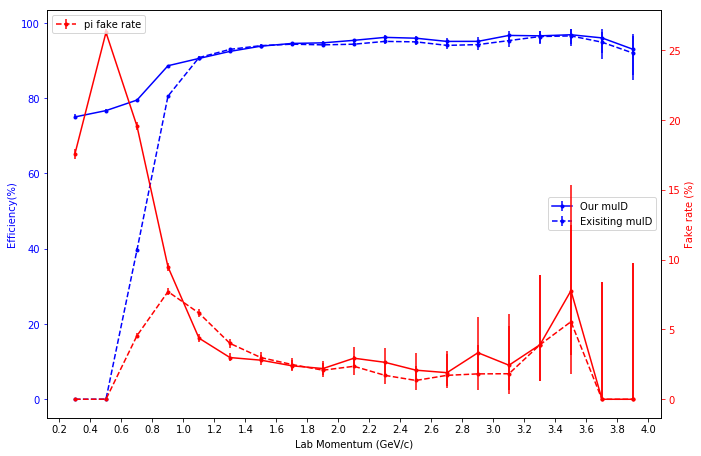

In [8]:
mom_plot = np.arange(0.3, 4.1, 0.2)

fig, ax1 = plt.subplots(figsize=(11, 7.5))
ax1.errorbar(mom_plot, new_eff, yerr=[new_eff-new_eff_ll, new_eff_ul-new_eff], fmt='b.-',label='Our muID')
ax1.set_xlabel('Lab Momentum (GeV/c)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Efficiency(%)' , color='b')
ax1.tick_params('y', colors='b')
ax1.errorbar(mom_plot, std_eff,yerr=[std_eff-std_eff_ll, std_eff_ul-std_eff], fmt='b--.',label='Exisiting muID')
ax1.set_xticks(np.arange(0.2, 4.1, 0.2))
ax1.legend(loc=5)

ax2 = ax1.twinx()
ax2.errorbar(mom_plot, new_fake_pi, yerr=[new_fake_pi-new_fake_pi_ll, new_fake_pi_ul-new_fake_pi], fmt='r.-')
ax2.errorbar(mom_plot, std_fake_pi, yerr=[std_fake_pi-std_fake_pi_ll, std_fake_pi_ul-std_fake_pi],fmt= 'r--.',label='pi fake rate')
ax2.set_ylabel('Fake rate (%)', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc=2)

fig.savefig("overall.png")

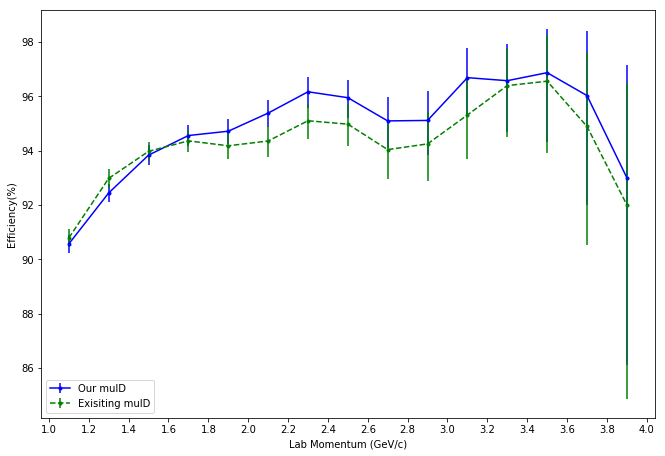

In [9]:
fig, ax1 = plt.subplots(figsize=(11, 7.5))
ax1.errorbar(mom_plot[4:], new_eff[4:], yerr=[new_eff[4:]-new_eff_ll[4:], new_eff_ul[4:]-new_eff[4:]], fmt='b.-',label='Our muID')
ax1.set_xlabel('Lab Momentum (GeV/c)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Efficiency(%)')
#ax1.tick_params('y', colors='b')
ax1.set_xticks(np.arange(1.0, 4.1, 0.2))

ax1.errorbar(mom_plot[4:], std_eff[4:],yerr=[std_eff[4:]-std_eff_ll[4:], std_eff_ul[4:]-std_eff[4:]], fmt='g--.',label='Exisiting muID')

ax1.legend(loc=3)

fig.savefig("eff_ci.png")

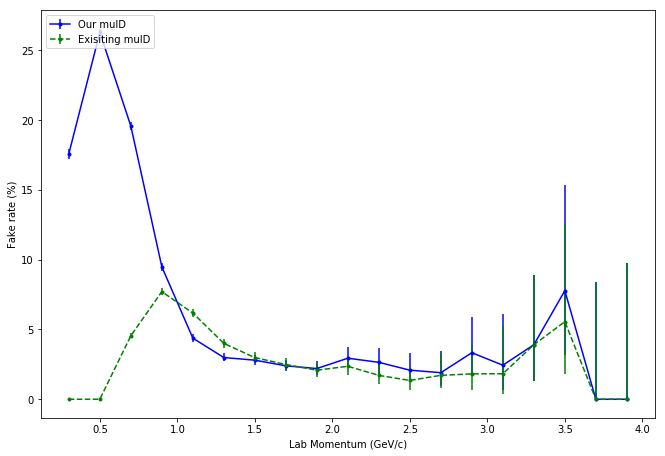

In [10]:
fig, ax1 = plt.subplots(figsize=(11, 7.5))

ax1.errorbar(mom_plot, new_fake_pi, yerr=[new_fake_pi-new_fake_pi_ll,new_fake_pi_ul-new_fake_pi], fmt='b.-',label='Our muID')
ax1.set_xlabel('Lab Momentum (GeV/c)')
ax1.set_ylabel('Fake rate (%)')

ax1.errorbar(mom_plot, std_fake_pi, yerr=[std_fake_pi-std_fake_pi_ll,std_fake_pi_ul-std_fake_pi],fmt= 'g--.',label='Exisiting muID')

ax1.legend(loc=2)

fig.savefig("fake_pi.png")